# Dataset load-in


In [ ]:
## load csv file from cloud drive
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/MyDrive/Colab Notebooks/"  # this is your drive

Mounted at /content/drive/


In [ ]:
import pandas as pd
df = pd.read_csv(data_path +"cleaned_dataset2.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


# Preprocess the dataset for model training

In [ ]:
# split target and features
X = df.drop(columns=['CLASS','ID','No_Pation'])
y = df['CLASS']


X.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [ ]:
y.head()

,CLASS
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# divide dataset into trainingpart and testing part
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest model and Gradient Boosting model apply

### Apply Random Forest Classifier and Gradient Boosting Classifier from sklearn liabrary

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#apply Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#apply Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Apply LightGBM on this Data set

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,  #number of the class we have in dataset
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'seed': 42
}

early_stopping_callback = lgb.early_stopping(stopping_rounds=10, verbose=True)

gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data],
                callbacks=[early_stopping_callback])
y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = y_pred_prob.argmax(axis=1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

# Evaluation of the performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate the preformance of Random Forest Model
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance analysis：")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Evaluate the preformance of Gradient Boosting Model
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Performance analysis：")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

#Evaluate the performance of LightGBM Model
y_pred = y_pred_prob.argmax(axis=1)
print("LightGBM Performance analysis：")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Performance analysis：
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.99      0.99      0.99       173
           2       1.00      1.00      1.00         6

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200

Gradient Boosting Performance analysis：
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.99      0.99      0.99       173
           2       1.00      1.00      1.00         6

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200

LightGBM Performance analysis：
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.95     

# Performance Classification on two models from sklearn

In [ ]:
from sklearn.model_selection import cross_val_score

#Use cross value score to Evaluate the performance
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(gb, X_scaled, y, cv=5, scoring='accuracy')

print("Cross val score of Random Forest model：", cv_scores_rf.mean())
print("Cross val score of Gradient Boosting model：", cv_scores_gb.mean())

Cross val score of Random Forest model： 0.9490000000000001
Cross val score of Gradient Boosting model： 0.9549999999999998


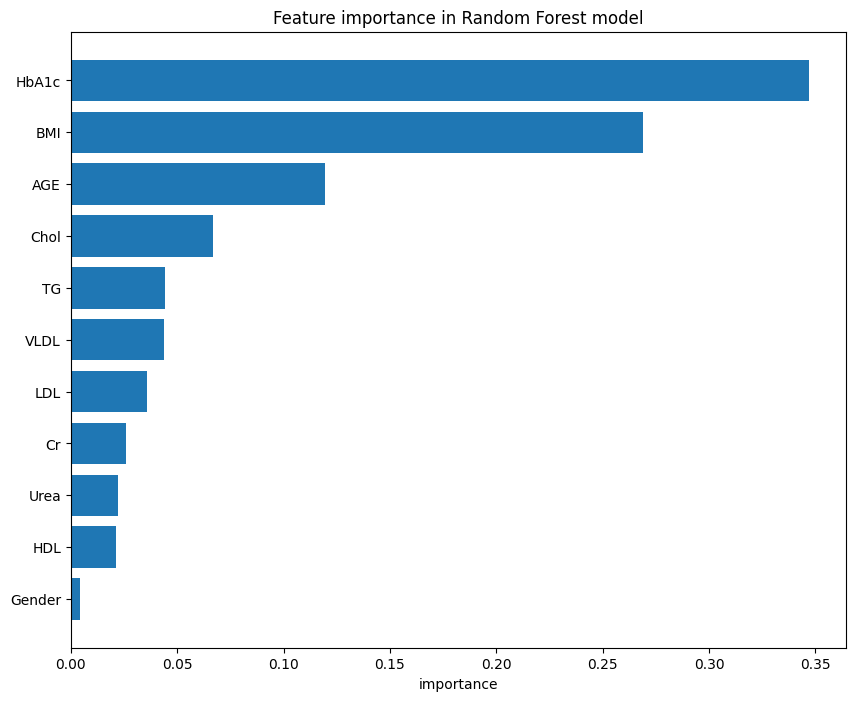

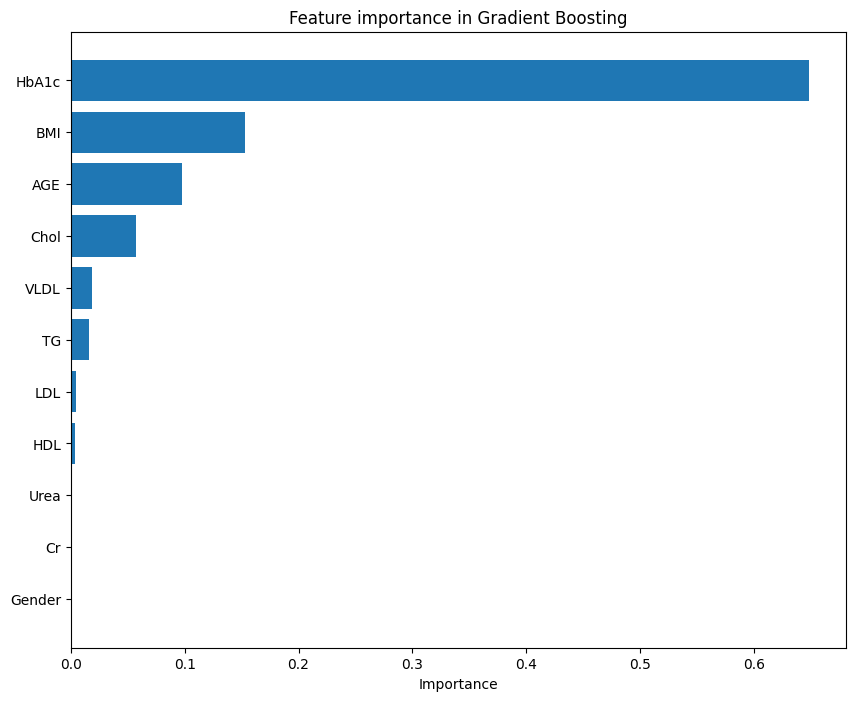

In [ ]:
import matplotlib.pyplot as plt

# check the feature importance in Random Forest model
feature_importances_rf = rf.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances_rf.argsort()

plt.figure(figsize=(10, 8))
plt.title('Feature importance in Random Forest model')
plt.barh(range(len(sorted_indices)), feature_importances_rf[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('importance')
plt.show()

# check the feature importance in Gradient Boosting model
feature_importances_gb = gb.feature_importances_
sorted_indices = feature_importances_gb.argsort()

plt.figure(figsize=(10, 8))
plt.title('Feature importance in Gradient Boosting')
plt.barh(range(len(sorted_indices)), feature_importances_gb[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Importance')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weig

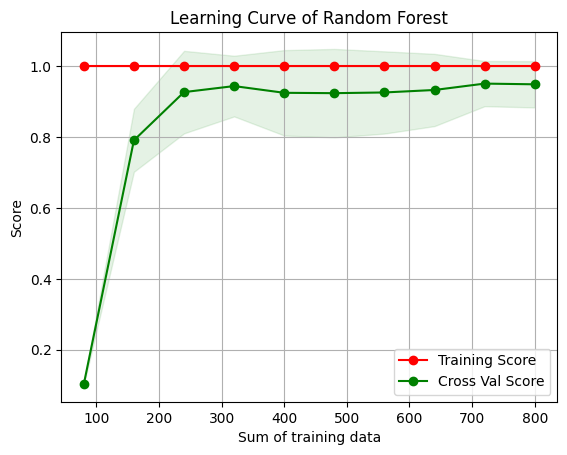

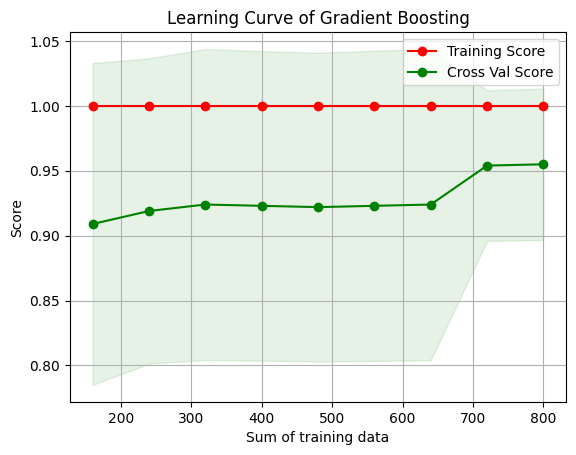

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

#apply learning curve on two models
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Sum of training data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross Val Score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(rf, "Learning Curve of Random Forest", X_scaled, y, cv=5)
plot_learning_curve(gb, "Learning Curve of Gradient Boosting", X_scaled, y, cv=5)
plt.show()

The possible reason that cause the low Cross val score in Random Forest model when the training data is low might be the low dataset of the 2 type("Possible Diabetic") in CLASS column. Will try to deal with it later.
This problem also appears when dealing with LightGBM Model

In [ ]:
import joblib

model_path = 'lightgbm_data2.pkl'
joblib.dump(gbm, model_path)
print(f"File saved as {model_path}")

model_path = 'skGradientBoosting_data2.pkl'
joblib.dump(gb, model_path)
print(f"File saved as {model_path}")

model_path = 'RandomForest_data2.pkl'
joblib.dump(rf, model_path)
print(f"File saved as {model_path}")

File saved as lightgbm_data2.pkl
File saved as skGradientBoosting_data2.pkl
File saved as RandomForest_data2.pkl
